In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Import dataset

| Column name                    | Description                                                                                                                 |
| ------------------------------ | --------------------------------------------------------------------------------------------------------------------------- |
| CUST_ID                        | Identification of Credit Card holder (Categorical)                                                                          |
| BALANCE                        | Balance amount left in their account to make purchases                                                                      |
| BALANCE_FREQUENCY              | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)           |
| PURCHASES                      | Amount of purchases made from account                                                                                       |
| ONEOFF_PURCHASES               | Maximum purchase amount done in one-go                                                                                      |
| INSTALLMENTS_PURCHASES         | Amount of purchase done in installment                                                                                      |
| CASH_ADVANCE                   | Cash in advance given by the user                                                                                           |
| PURCHASES_FREQUENCY            | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
| ONEOFFPURCHASESFREQUENCY       | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)                   |
| PURCHASESINSTALLMENTSFREQUENCY | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)                      |
| CASHADVANCEFREQUENCY           | How frequently the cash in advance being paid                                                                               |
| CASHADVANCETRX                 | Number of Transactions made with "Cash in Advanced"                                                                         |
| PURCHASES_TRX                  | Number of purchase transactions made                                                                                        |
| CREDIT_LIMIT                   | Limit of Credit Card for user                                                                                               |
| PAYMENTS                       | Amount of Payment done by user                                                                                              |
| MINIMUM_PAYMENTS               | Minimum amount of payments made by user                                                                                     |
| PRCFULLPAYMENT                 | Percent of full payment paid by user                                                                                        |
| TENURE                         | Tenure of credit card service for user                                                                                      |

In [54]:
dataset_df = pd.read_csv('marketing_data.csv')
dataset_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## Clean data

In [55]:
dataset_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<AxesSubplot: >

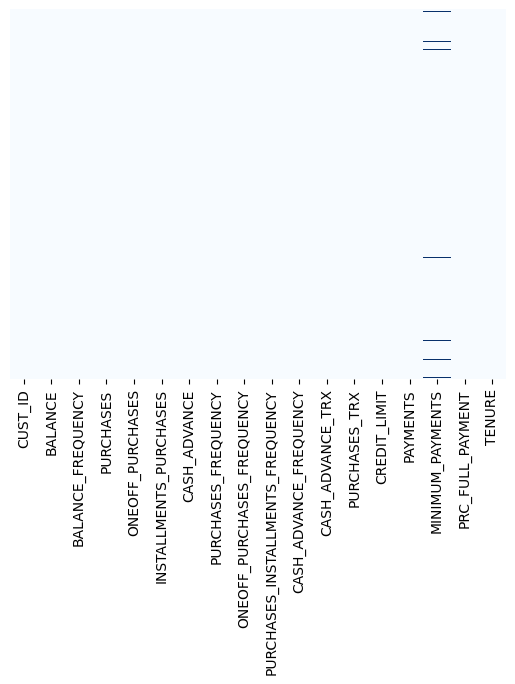

In [56]:
sns.heatmap(dataset_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [57]:
dataset_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [58]:
dataset_df['MINIMUM_PAYMENTS'].fillna(dataset_df['MINIMUM_PAYMENTS'].median(), inplace=True)
dataset_df['CREDIT_LIMIT'].fillna(dataset_df['CREDIT_LIMIT'].median(), inplace=True)

dataset_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [59]:
dataset_df.drop(columns=['CUST_ID'], inplace=True)
dataset_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Visualization

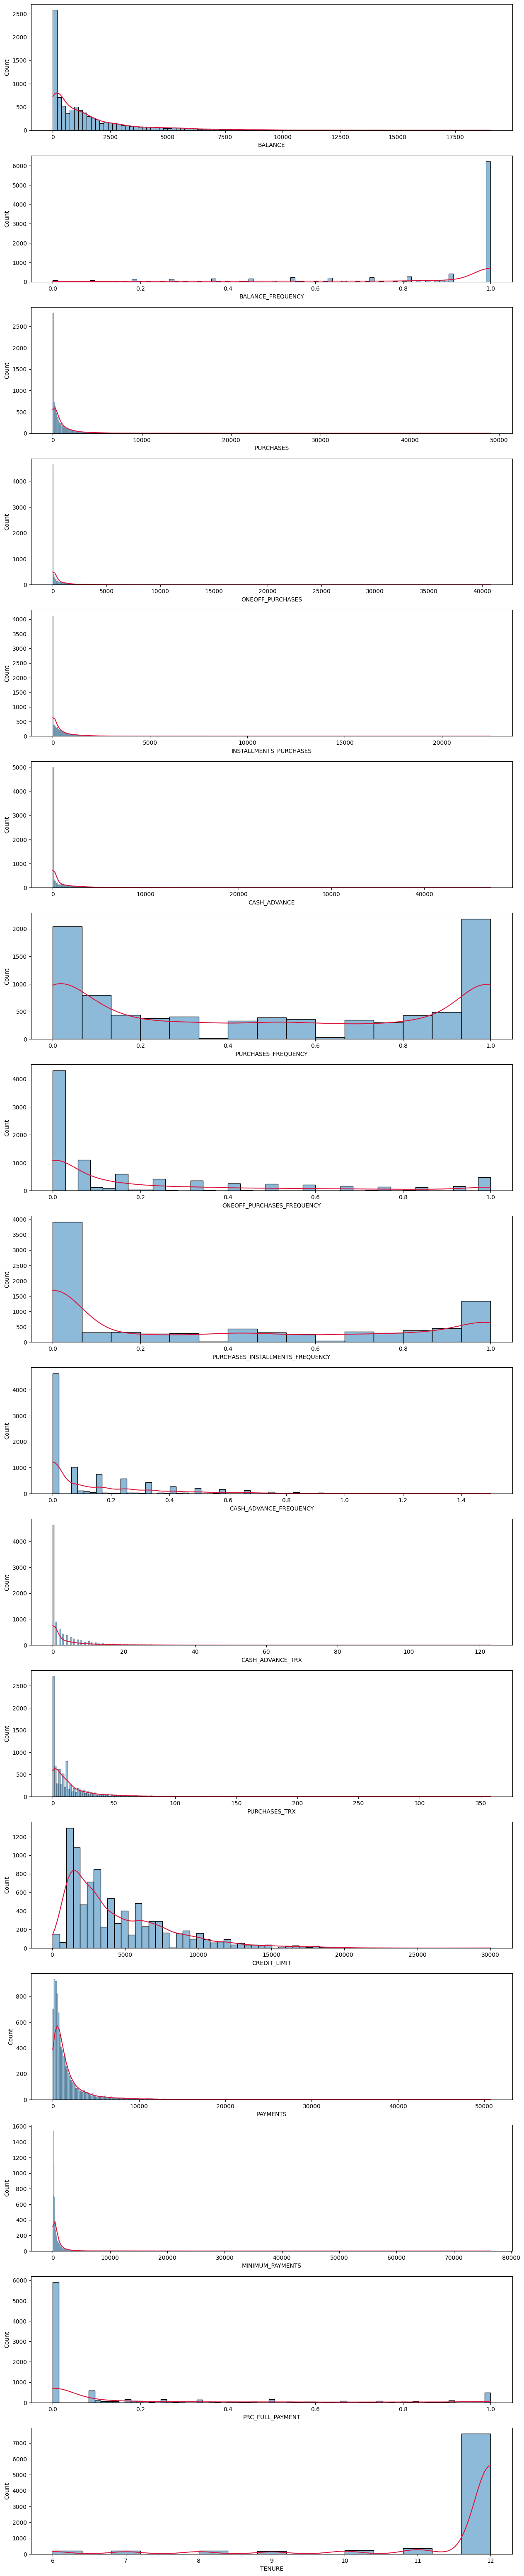

In [60]:
columns = dataset_df.columns

figure, axes = plt.subplots(len(columns), 1, figsize=(15, 80))

for index, column in enumerate(columns):
  axis = sns.histplot(
    dataset_df[column],
    kde=True,
    ax=axes[index],
  )
  axis.lines[0].set_color('crimson')


<AxesSubplot: >

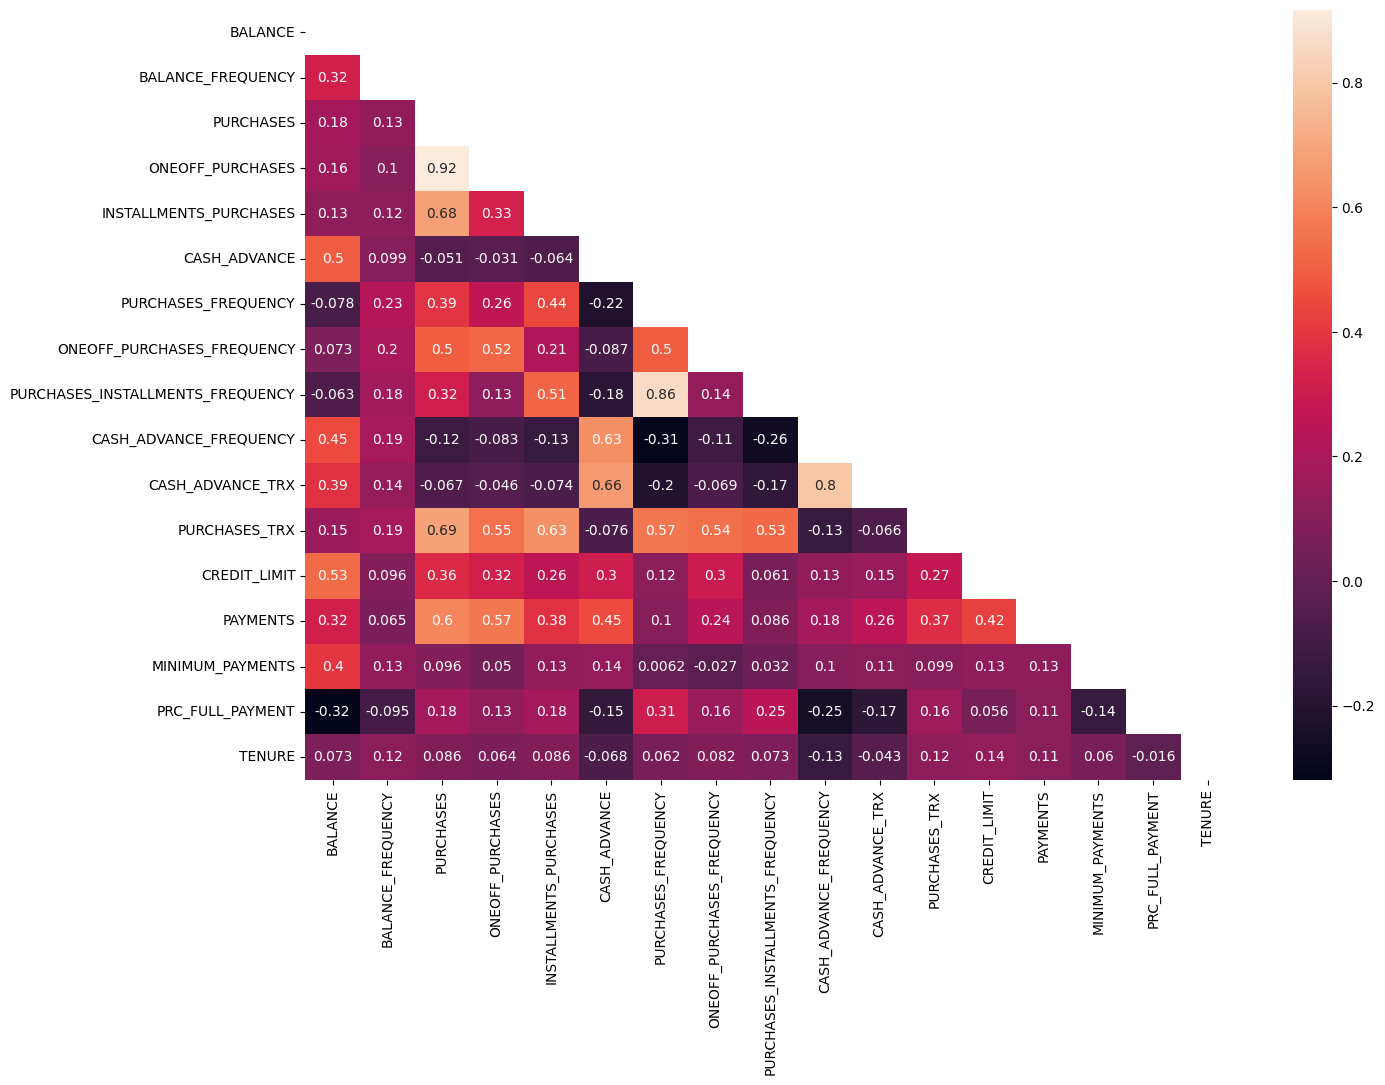

In [61]:
figure, axis = plt.subplots(figsize=(15, 10))
sns.heatmap(dataset_df.corr(), annot=True, mask=np.triu(dataset_df.corr()), ax=axis)

<AxesSubplot: xlabel='PURCHASES', ylabel='ONEOFF_PURCHASES'>

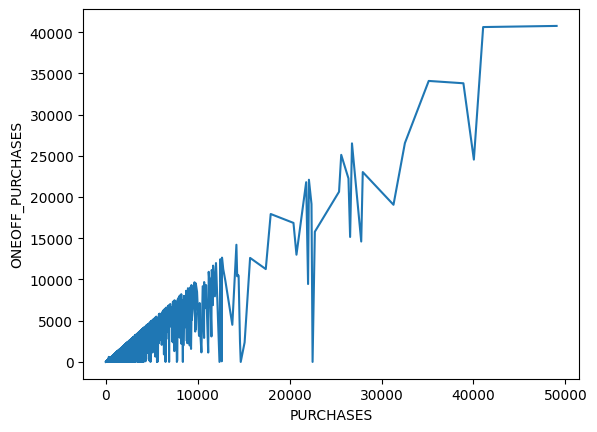

In [62]:
sns.lineplot(dataset_df, x='PURCHASES', y='ONEOFF_PURCHASES')


## Clustering

In [63]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(dataset_df), columns=dataset_df.columns)

scaled_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.486217,-0.341250,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.503396,-0.228307,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960378,-0.570615,-0.326875,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097800,-0.580536,-0.338305,0.329200,-4.122768


<AxesSubplot: >

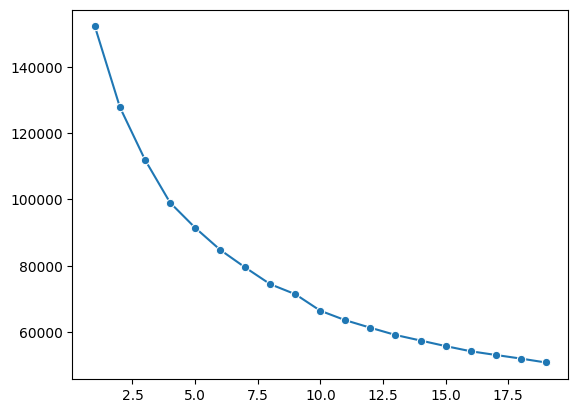

In [64]:
WCSSs = {}

for k in range(1, 20):
  k_means = KMeans(n_clusters=k, n_init=10)
  k_means.fit(scaled_df)
  WCSSs[k] = k_means.inertia_

sns.lineplot(WCSSs, marker='o')


In [65]:
k_means = KMeans(n_clusters=9, n_init=10)
k_means.fit(scaled_df)

KMeans(n_clusters=9, n_init=10)

In [66]:
k_means.labels_

array([0, 8, 5, ..., 3, 3, 3], dtype=int32)

In [67]:
cluster_centers_df = pd.DataFrame(k_means.cluster_centers_, columns=dataset_df.columns)
cluster_centers_df


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.017837,0.402701,-0.362537,-0.247926,-0.401616,-0.088575,-0.868976,-0.413287,-0.758373,0.113365,-0.022909,-0.487906,-0.304679,-0.248612,-0.035498,-0.457231,0.271663
1,0.864328,0.468202,2.251903,1.780102,2.054304,-0.191767,1.158846,1.623811,1.203385,-0.299620,-0.208251,2.702793,1.246871,1.272039,0.281105,0.309494,0.333569
2,-0.371500,0.332984,-0.036526,-0.243099,0.360064,-0.362998,0.990936,-0.385010,1.205712,-0.474348,-0.360376,0.185561,-0.257374,-0.213717,-0.088908,0.319875,0.257072
3,-0.336032,-0.346960,-0.290847,-0.218147,-0.286565,0.069145,-0.203666,-0.291032,-0.223434,0.310248,0.001765,-0.388372,-0.568907,-0.392640,-0.215843,0.014880,-3.205863
4,-0.701321,-2.147315,-0.312596,-0.237858,-0.302026,-0.321535,-0.557810,-0.448320,-0.438513,-0.520450,-0.375848,-0.420104,-0.178877,-0.203061,-0.284590,0.277666,0.199423
5,-0.178530,0.386148,0.424564,0.565183,-0.034613,-0.338346,0.929545,1.867551,0.062913,-0.414985,-0.327501,0.504870,0.349454,0.066398,-0.159728,0.407978,0.258375
6,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044081,8.098975,1.127533,1.110132,0.310863
7,1.290312,0.454124,-0.039755,-0.268864,0.399233,-0.000938,0.022469,-0.528409,0.262206,-0.252602,-0.060885,0.219536,-0.004918,-0.129901,11.639130,-0.525551,0.298409
8,1.680438,0.392918,-0.216423,-0.153426,-0.229925,2.033299,-0.470879,-0.205494,-0.409193,1.941752,1.953242,-0.261768,1.033454,0.832120,0.396117,-0.389489,0.069989


In [68]:
cluster_centers_df = scaler.inverse_transform(cluster_centers_df)
cluster_centers_df = pd.DataFrame(cluster_centers_df, columns=dataset_df.columns)
cluster_centers_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1601.600441,0.972667,228.637954,180.930181,47.890858,793.125137,0.141588,0.079166,0.063041,0.157830,3.092490,2.582316,3385.725737,1013.435229,762.100904,0.019982,11.880873
1,3363.500428,0.988183,5814.430907,3547.041746,2268.749705,576.727644,0.955451,0.686872,0.842693,0.075187,1.827664,81.891156,9030.952381,5415.571213,1500.630501,0.244236,11.963719
2,791.228519,0.956152,925.165935,188.942329,736.669132,217.647182,0.888061,0.087602,0.843618,0.040222,0.789526,19.322195,3557.840500,1114.455259,637.514646,0.247273,11.861347
3,865.053452,0.795079,381.805926,230.358696,151.930322,1123.871809,0.408609,0.115637,0.275639,0.197228,3.260870,5.056361,2424.347826,596.489461,341.418843,0.158067,7.227053
4,104.735340,0.368592,335.339312,197.642005,137.949473,304.596210,0.266475,0.068715,0.190161,0.030997,0.683942,4.267630,3843.448976,1145.302906,181.054794,0.234927,11.784197
5,1192.879648,0.968746,1910.293062,1530.525245,379.767817,269.343522,0.863422,0.759584,0.389441,0.052101,1.013876,27.259019,5765.751409,1925.360387,472.316424,0.273041,11.863090
6,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
7,4250.150569,0.984849,918.267222,146.178056,772.089167,976.903069,0.499369,0.044823,0.468645,0.084596,2.833333,20.166667,4476.388889,1357.092339,27995.061876,0.000000,11.916667
8,5062.164220,0.970349,540.812757,337.782185,203.149346,5242.793682,0.301364,0.141155,0.201813,0.523709,16.578271,8.203271,8254.444562,4142.049642,1768.915002,0.039796,11.610981


In [69]:
dataset_df['cluster'] = k_means.labels_
dataset_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,8
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,3


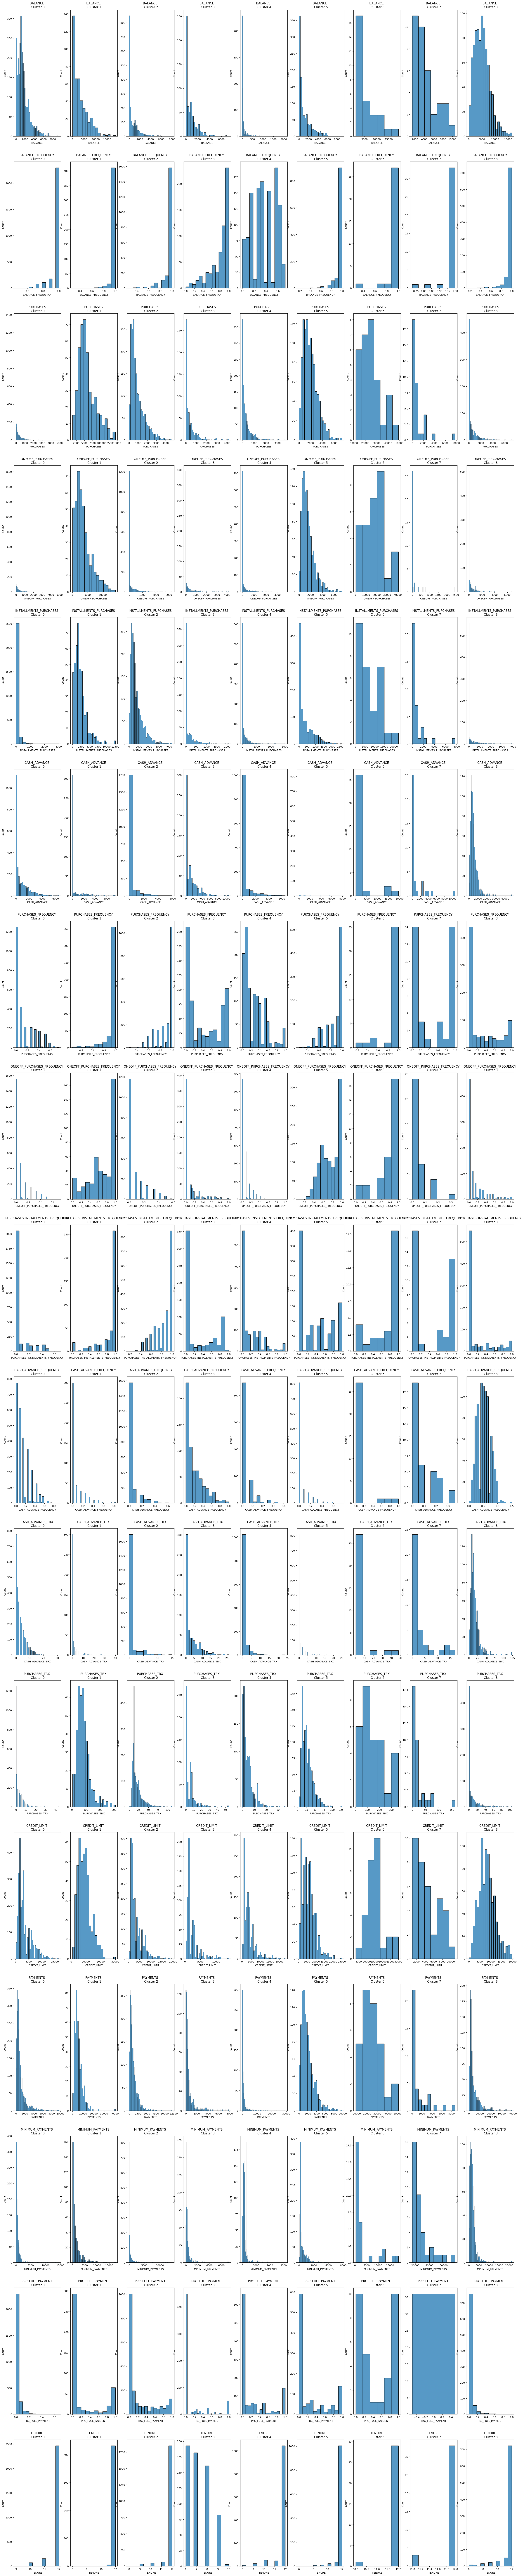

In [70]:
features_count = len(dataset_df.columns) - 1
labels_count = k_means.n_clusters

figure, axes = plt.subplots(
  features_count,
  labels_count,
  figsize=(35, labels_count * 20),
)

for i, column_name in enumerate(dataset_df.columns[:-1]):
  for j in range(labels_count):
    cluster_df = dataset_df[dataset_df['cluster'] == j]
    axis = sns.histplot(cluster_df[column_name], ax=axes[i][j])
    axis.set_title(f'{column_name} \n Cluster {j}')

## PCA (Principal Component Analysis)

In [74]:
pca = sklearn.decomposition.PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
principal_components

array([[-1.68364782, -1.07223109],
       [-1.13408087,  2.50914248],
       [ 0.96939253, -0.3835636 ],
       ...,
       [-0.9289853 , -1.80803255],
       [-2.33784427, -0.65359772],
       [-0.55802787, -0.40065638]])

In [75]:
pca_df = pd.DataFrame(principal_components, columns=['PCA 1', 'PCA 2'])
pca_df

,PCA 1,PCA 2
0,-1.683648,-1.072231
1,-1.134081,2.509142
2,0.969393,-0.383564
3,-0.888220,0.004656
4,-1.600020,-0.683787
...,...,...
8945,-0.362572,-2.013427
8946,-0.580810,-1.675620
8947,-0.928985,-1.808033
8948,-2.337844,-0.653598


In [76]:
pca_df['cluster'] = k_means.labels_
pca_df


,PCA 1,PCA 2,cluster
0,-1.683648,-1.072231,0
1,-1.134081,2.509142,8
2,0.969393,-0.383564,5
3,-0.888220,0.004656,0
4,-1.600020,-0.683787,0
...,...,...,...
8945,-0.362572,-2.013427,3
8946,-0.580810,-1.675620,3
8947,-0.928985,-1.808033,3
8948,-2.337844,-0.653598,3


<AxesSubplot: xlabel='PCA 1', ylabel='PCA 2'>

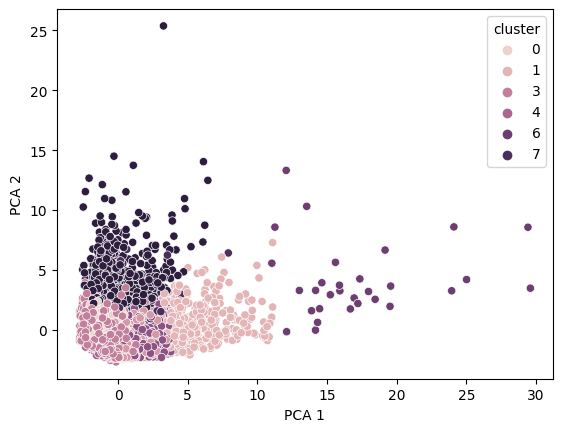

In [77]:
sns.scatterplot(pca_df, x='PCA 1', y='PCA 2', hue='cluster')

<AxesSubplot: xlabel='PURCHASES', ylabel='ONEOFF_PURCHASES'>

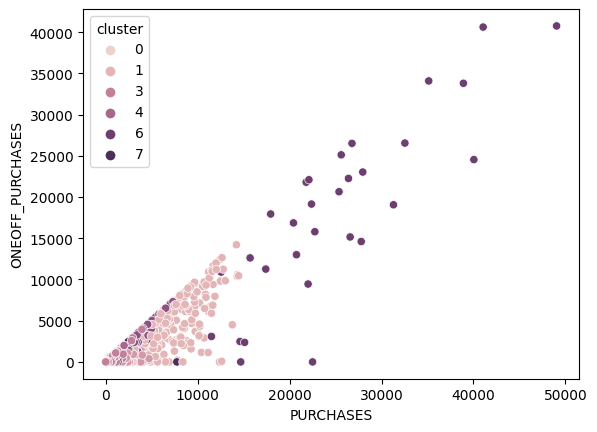

In [79]:
sns.scatterplot(dataset_df, x='PURCHASES', y='ONEOFF_PURCHASES', hue='cluster')

<AxesSubplot: xlabel='BALANCE', ylabel='CREDIT_LIMIT'>

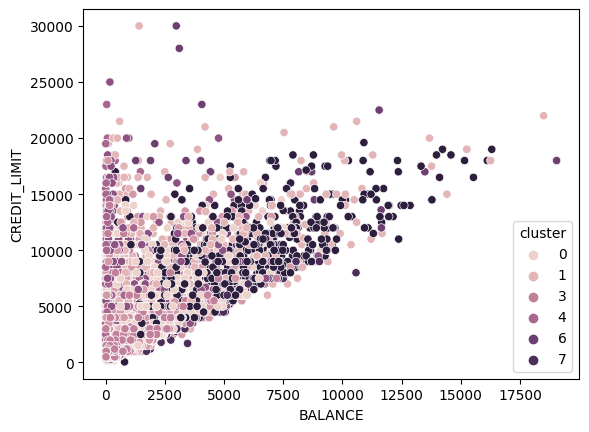

In [80]:
sns.scatterplot(dataset_df, x='BALANCE', y='CREDIT_LIMIT', hue='cluster')